# Курсовая работа #

## Часть 1

Для начала возьмем данные из exel таблицы с помощью библиотеки pandas

In [6]:
import pandas as pd
data = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Ярыгин')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(x,y)

[0, 8, 10, 20, 21, 30, 43, 50, 65, 75, 87, 100, 125, 130, 150, 172, 200, 250, 254, 300, 341, 400, 500, 514, 600, 700, 747, 800, 900, 1000, 1100, 1200, 1212] [12.5, 12.66, 12.66, 12.64, 12.64, 12.64, 12.64, 12.64, 12.63, 12.64, 12.66, 12.52, 11.94, 11.77, 10.84, 9.73, 8.9, 7.75, 8.16, 7.03, 6.76, 6.07, 5.21, 5.12, 4.71, 4.38, 4.28, 4.14, 3.89, 3.63, 3.37, 3.11, 3.08]


Будем искать апроксимирующую функцию в виде y = ax + b

In [7]:
import numpy as np
def MNK(x, y):
    c1 = np.sum(np.multiply(x, x))
    c2 = np.sum(x)
    c3 = np.sum(np.multiply(x, y))
    d1 = c2
    d2 = len(x)
    d3 = np.sum(y)
    A = np.array([[c1, c2], [d1, d2]])
    B = np.array([[c3],[d3]])
    E = np.linalg.solve(A, B)
    a = E[0,0]
    b = E[1,0]
    return(a, b)
a, b = MNK(x, y)

Строим график полученной функции и отмечаем иходные точки

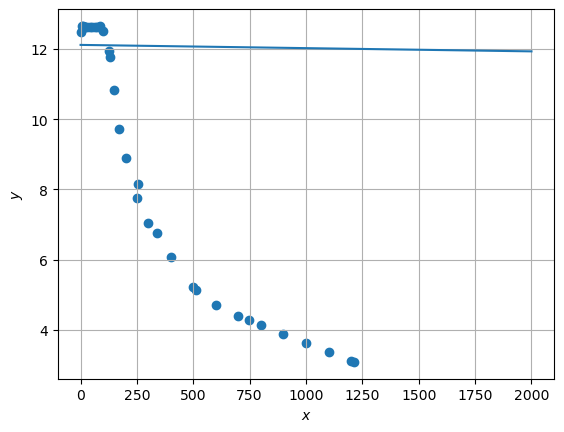

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
c = np.arange(-10, 10.01, 0.01)
plt.scatter(x, y)
plt.plot(a*c+b)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Часть 2

In [59]:
import pandas as pd
df = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Lagrange')
df = df.dropna()
x_values = df.iloc[:,0].tolist()
y_values = df.iloc[:,1].tolist()
print(x_values, y_values)


[233.0, 232.5, 232.8, 234.1, 234.0, 233.0, 231.0, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7, 173.6, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114.0, 113.9, 107.8, 101.5, 95.4] [0, 8, 10, 19, 20, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 252, 287, 302, 376, 403, 504, 603, 605, 706, 807, 904]


In [133]:
def create_basic_polynomial(x_values, i):
    def basic_polynomial(x):
        divider = 1
        result = 1
        for j in range(len(x_values)):
            if j != i:
                result *= (x-x_values[j])
                divider *= (x_values[i]-x_values[j])
            if divider == 0:
                divider = 1
        return result/divider
    return basic_polynomial


def create_Lagrange_polynomial(x_values, y_values):
    basic_polynomials = []
    for i in range(len(x_values)):
        basic_polynomials.append(create_basic_polynomial(x_values, i))

    def lagrange_polynomial(x):
        result = 0
        for i in range(len(y_values)):
            result += y_values[i]*basic_polynomials[i](x)
        return result
    return lagrange_polynomial


lag_pol = create_Lagrange_polynomial(x_values, y_values)

for x in x_values:
    print(lag_pol(x))

0.0
8.0
10.0
19.0
20.0
0.0
50.0
58.0
75.0
78.0
101.0
118.0
126.0
151.0
153.0
201.0
252.0
287.0
302.0
376.0
403.0
504.0
603.0
605.0
706.0
807.0
904.0


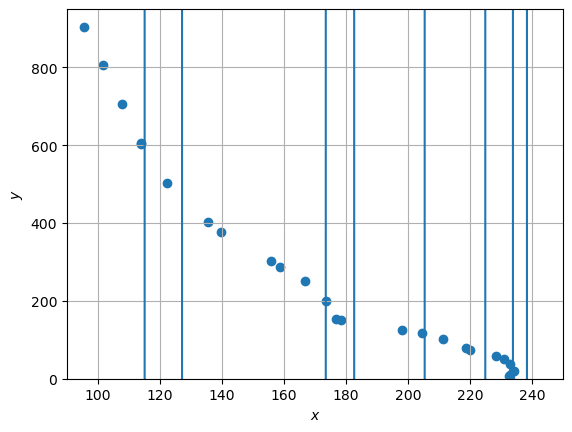

In [132]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([90, 250])
ax.set_ylim([0, 950])
c = np.linspace(95.4, 234.1, 400)
plt.scatter(x_values, y_values) 
plt.plot(lag_pol(c))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()